In [2]:
import pandas as pd
import polaris as po
import numpy as np

/home/hmacdope/mambaforge/envs/polaris_new2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def determine_subchallenge(data):
    sub = data["test"]
    if "Ligand Pose" in sub.keys():
        challenge = "Ligand Pose"
    elif "pIC50 (MERS-CoV Mpro)" and "pIC50 (SARS-CoV-2 Mpro)" in sub.keys():
        challenge = "Potency"
    elif "HLM" and "MLM" in sub.keys():
        challenge = "ADMET"
    else:
        raise ValueError()
    return challenge

In [4]:
admet_dataset = po.load_dataset("asap-discovery/antiviral-admet-2025-unblinded")

admet_data = pd.DataFrame(admet_dataset[:])

⠇ Fetching dataset... 

2025-07-09 14:54:47.069 | INFO     | polaris._artifact:_validate_version:84 - The version of Polaris that was used to create the artifact (0.11.8.dev4+g40e3b2b.d20250207) is different from the currently installed version of Polaris (0.9.2).
2025-07-09 14:54:47.069 | WARNING  | polaris.dataset._base:zarr_root:179 - You're loading data from a remote location. If the dataset is small enough, consider caching the dataset first using DatasetV2.cache() for more performant data access.


✅ SUCCESS: Fetched dataset.
 


/home/hmacdope/mambaforge/envs/polaris_new2/lib/python3.10/site-packages/yaspin/core.py:239: UserWarning: color, on_color and attrs are not supported when running in jupyter
  self._color = self._set_color(value) if value else value


In [5]:
len(admet_data)

560

In [11]:
admet_train = admet_data.query("Set == 'Train'")

In [12]:
admet_test = admet_data.query("Set == 'Test'")

In [13]:
def remove_nan(l):
    return l[~np.isnan(l)]

In [14]:
hlm_train = remove_nan(admet_train['HLM'].values)
mlm_train = remove_nan(admet_train['MLM'].values)
ksol_train = remove_nan(admet_train['KSOL'].values)
logd_train = remove_nan(admet_train['LogD'].values)
perm_train = remove_nan(admet_train['MDR1-MDCKII'].values)

In [15]:
hlm_test = remove_nan(admet_test['HLM'].values)
mlm_test = remove_nan(admet_test['MLM'].values)
ksol_test = remove_nan(admet_test['KSOL'].values)
logd_test = remove_nan(admet_test['LogD'].values)
perm_test = remove_nan(admet_test['MDR1-MDCKII'].values)

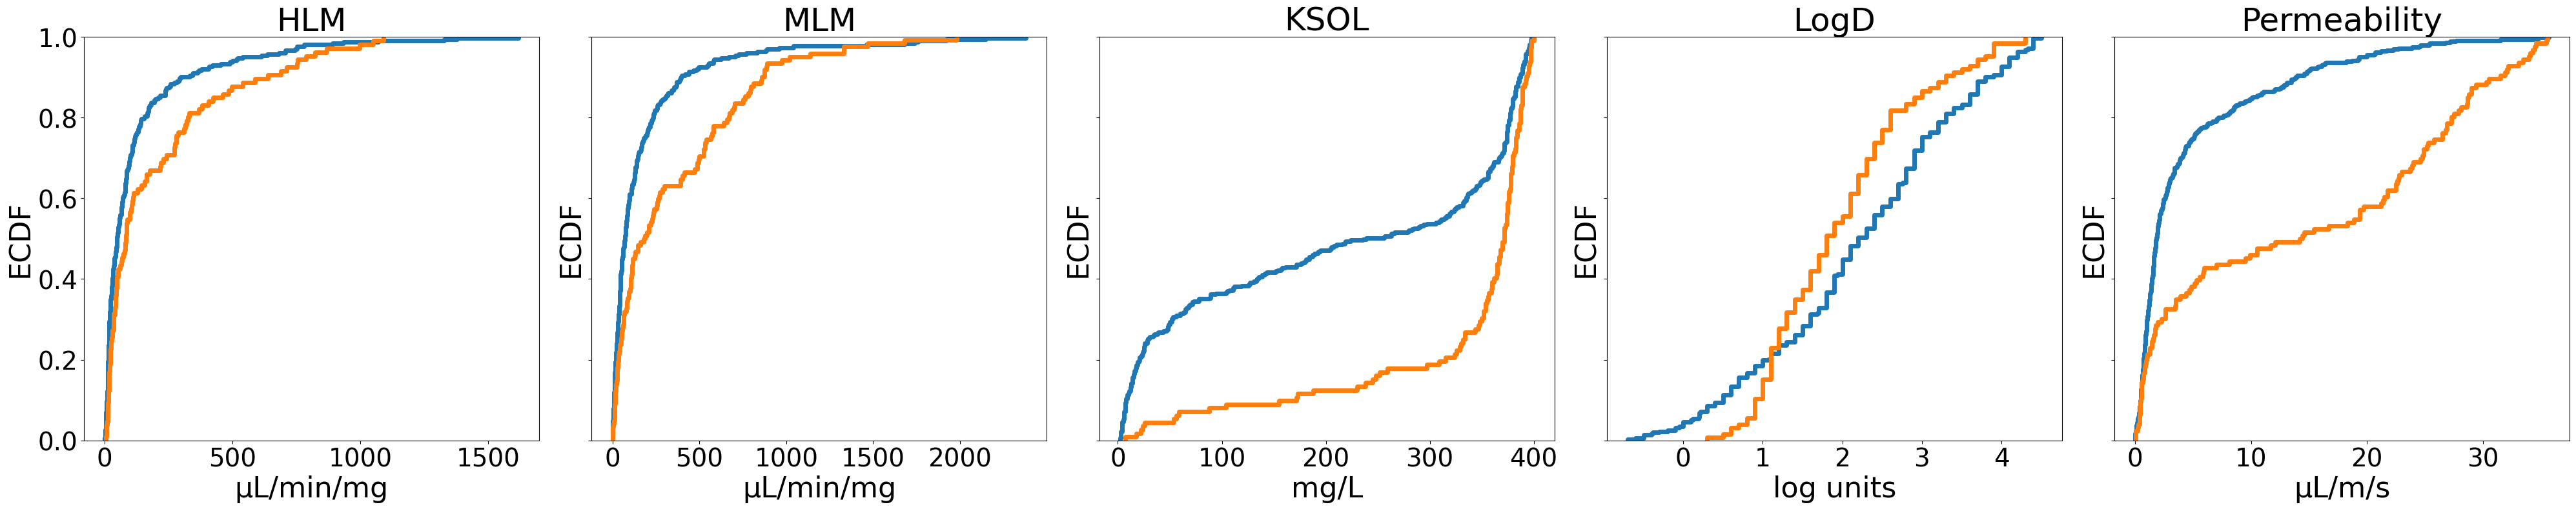

In [33]:
import matplotlib.pyplot as plt

lists = [(hlm_train, hlm_test), (mlm_train, mlm_test), (ksol_train, ksol_test), (logd_train,logd_test),  (perm_train, perm_test)]
labels = ['HLM', 'MLM', 'KSOL', 'LogD', 'Permeability']
axlabels = [u"\u03bcL/min/mg", u"\u03bcL/min/mg", "mg/L", "log units", u"\u03bcL/m/s"]

fig, axes = plt.subplots(1, 5, figsize=(40, 8), sharey=True)  # Double the size

for ax, data, label, axlabel in zip(axes, lists, labels, axlabels):
    train, test = data
    ax.ecdf(train, linewidth=5)  # Double the line width
    ax.ecdf(test, linewidth=5)  # Double the line width

    ax.set_title(label, fontsize=36)
    ax.set_xlabel(axlabel, fontsize=32)
    ax.set_ylabel('ECDF', fontsize=32)
    ax.tick_params(axis='both', which='major', labelsize=28)

plt.tight_layout()
plt.savefig("admet_endpoints.png", dpi=300)
plt.show()

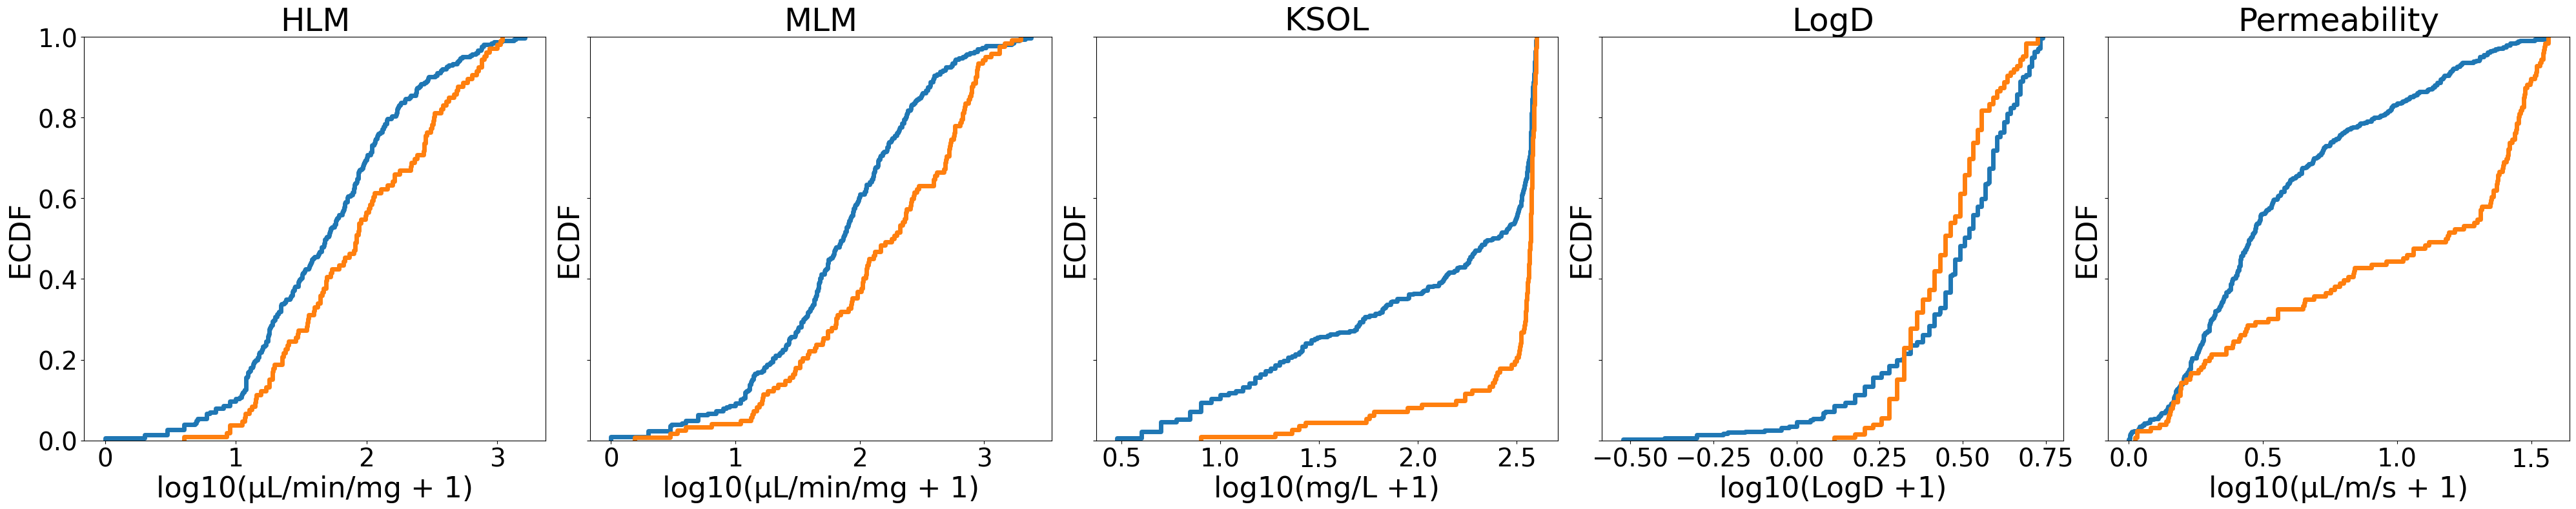

In [44]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt

lists = [(hlm_train, hlm_test), (mlm_train, mlm_test), (ksol_train, ksol_test), (logd_train,logd_test),  (perm_train, perm_test)]
labels = ['HLM', 'MLM', 'KSOL', 'LogD', 'Permeability']
axlabels = [u"log10(\u03bcL/min/mg + 1)", u"log10(\u03bcL/min/mg + 1)", "log10(mg/L +1)" , "log10(LogD +1)", u"log10(\u03bcL/m/s + 1)"]

fig, axes = plt.subplots(1, 5, figsize=(40, 8), sharey=True)  # Double the size

for ax, data, label, axlabel in zip(axes, lists, labels, axlabels):
    train, test = data
    train_log = np.log10(train+1)
    test_log = np.log10(test+1)
    ax.ecdf(train_log, linewidth=5)  # Double the line width
    ax.ecdf(test_log, linewidth=5)  # Double the line width

    ax.set_title(label, fontsize=36)
    ax.set_xlabel(axlabel, fontsize=32)
    ax.set_ylabel('ECDF', fontsize=32)
    ax.tick_params(axis='both', which='major', labelsize=28)

plt.tight_layout()
plt.savefig("admet_endpoints_log10.png", dpi=300)
plt.show()